# 생존 분석

<aside>
💡 28회 기출에서는 기계 X,Y,Z 에 대한 생존분석 수행하라는 문제가 나왔음

</aside>

- 생존 분석(Survival Analysis)은 **‘생명체 관찰 시작~사망’**에 이르는 **생존시간을 추정**하는 통계적 분석법
    - 사망을 특정한 사건(Event)로 볼 때, 생존분석에서 사건은 ‘사망/퇴원/출산’ 등 다양한 지표가 될 수 있음
    - 고용기간 (고용~퇴직기간)
- **절단자료가 누락되지 않고 생존분석에 함께 사용**됨
    - **중도절단(Censoring)** : 데이터의 측정값이나 관찰치가 부분적으로만 존재
    - **Right censoring** : 연구 종료 전 사망 or 종료 후에도 생존
    - **Left censoring**: 연구 시작 전 특정 시점을 모르는 경우 (측정한 생존기간 < 실제 생존기간)

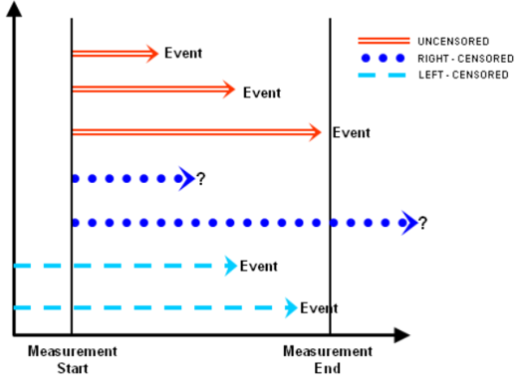

In [1]:
import pandas as pd
#구글 드라이브 csv 공유파일 불러오기
url="https://docs.google.com/spreadsheets/d/1wAq-idlv3mi6pZsQXIvxQkiyZc1gLV6y/edit?usp=share_link&ouid=114413639598009214225&rtpof=true&sd=true"
path='https://drive.google.com/uc?id='+url.split('/')[-2]
print(path)

data=pd.read_csv(path)
data.head()

https://drive.google.com/uc?id=1wAq-idlv3mi6pZsQXIvxQkiyZc1gLV6y


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [2]:
data[['YearsAtCompany', 'Attrition']].head()
# Attrition (조직에서 퇴직자에 대한 충원을 하지 않거나 하여 인원을 축소시키는 것)

,YearsAtCompany,Attrition
0,6,Yes
1,10,No
2,0,Yes
3,8,No
4,2,No


In [3]:
data['Attrition'].value_counts()

# No 1233
# Yes 237

data['Attrition'] = data['Attrition'].map({'Yes':1, "No":0})

In [ ]:
!pip install lifelines

## Kaplan-Meier 추정방법

- 카플란 마이어 추정방법은 **관찰 시간에 따라** **사건이 발생한 시점의 사건 발생률을 계산**하는 생존분석 방법
- **‘Survival Plot’**으로 제시됨


- 두 집단 사이의 유의한 차이를 검정하기 위해, **‘Log-Rank test(로그순위법)’ 또는 Wilcoxon test(윌콕슨 검정)을 사용**

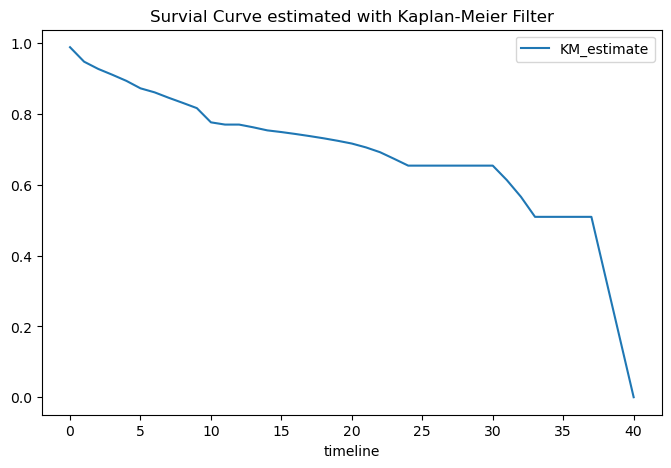

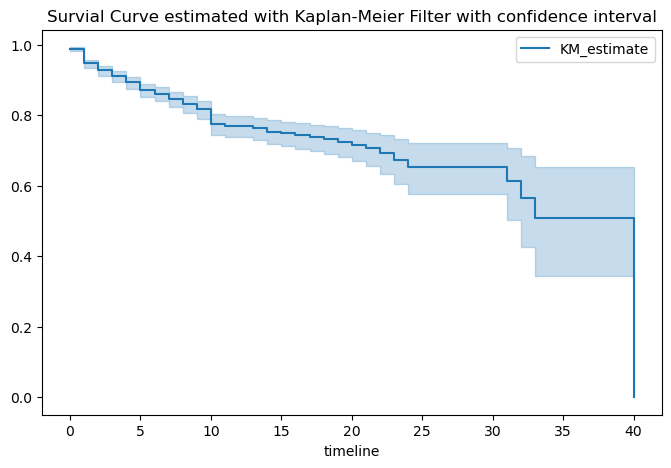

In [4]:
# 라이브러리 로드
from lifelines import KaplanMeierFitter
from lifelines.statistics import logrank_test
import matplotlib.pyplot as plt

# Kaplan-Meier 추정방법
# 관찰 시간에 따라 사건이 발생한 시점의 사건 발생률 계산
# 'survival plot'으로 제시됨
# KM 분석 개체 선언
kmf = KaplanMeierFitter()
# durations = 기간 , envent_observed=생존 여부
kmf.fit(durations=data['YearsAtCompany'], event_observed=data['Attrition'])

# Survival Plot 그리기
kmf.survival_function_.plot(figsize=(8,5))
plt.title('Survial Curve estimated with Kaplan-Meier Filter')
plt.show()

# Survival Plot 그리기 - with 신뢰구간
kmf.plot_survival_function(figsize=(8,5))
plt.title('Survial Curve estimated with Kaplan-Meier Filter with confidence interval')
plt.show()

In [8]:
# predict 에 기간을 입력하면 timeline의 생존확률 알려줌
kmf.predict(15)

0.749353556548477

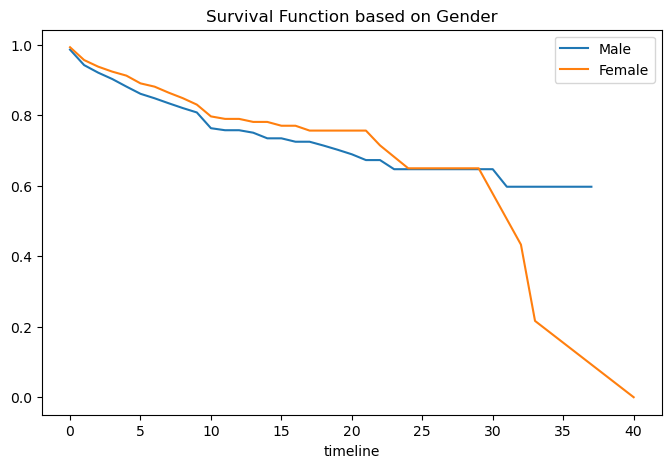

In [6]:
# 성별에 따른 차이
male = (data['Gender'] == 'Male')
female = (data['Gender'] == 'Female')

ax = plt.subplot()
kmf = KaplanMeierFitter()

kmf.fit(durations=data[male]['YearsAtCompany'], event_observed=data[male]['Attrition'], label='Male')
kmf.survival_function_.plot(figsize=(8,5), ax=ax)
kmf.fit(durations=data[female]['YearsAtCompany'], event_observed=data[female]['Attrition'], label='Female')
kmf.survival_function_.plot(figsize=(8,5), ax=ax)
plt.title('Survival Function based on Gender')
plt.show()

## 로그순위검정(Log-Rank Test)

- 로그순위법(Log-Rank Test)는 두 집단의 생존률을 비교하는 **비모수적 가설 검정 방법**
    
    1) 두 집단을 합한 전체 집단을 관찰 기간 순으로 배열
    
    2) 사건이 발생한 구간들에 대해, 집단별로 각 구간의 **사망 기대빈도** 계산
    
    3) 귀무가설로 두 집단의 위험함수가 동일하다고 설정
    
    4) 두 집단의 생존률 비교
- 두 집단 사이의 유의한 차이를 검정하기 위해 로그 순위법 또는 윌콕슨 검정을 이용
- 로그순위법은 두 집단의 생존률을 비교하는 **비모수적 가설 검정**

In [7]:
logrank_test(data[male]['YearsAtCompany'], data[female]['YearsAtCompany'],\
             data[male]['Attrition'], data[female]['Attrition'])
# P-value 0.18
# 대립가설 기각 차이가 없다.

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           1.79 0.18      2.47

In [11]:
#Education Field 집단별 차이 분석
data['EducationField'].value_counts()

# Life Sciences    606
# Medical          464
# Marketing        159
# Technical Degree 132
# Other            82
# Human Resources  27

df1 = data[data['EducationField']=='Life Sciences'][['EducationField', 'YearsAtCompany', 'Attrition']]
df2 = data[data['EducationField']=='Medical'][['EducationField','YearsAtCompany', 'Attrition']]
df3 = data[data['EducationField']=='Marketing'][['EducationField','YearsAtCompany', 'Attrition']]

# 로그순위법
logrank_test(df1['YearsAtCompany'], df2['YearsAtCompany'], df1['Attrition'], df2['Attrition'])

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           0.35 0.56      0.85

- H0: 두 집단의 생존함수가 동일하다
- H1: 두 집단의 생존함수는 동일하지 않다
- p > 0.05 대립가설 기각, 두 집단의 생존함수는 동일하다.

## 콕스의 비례위험모형

In [12]:
# Prepare the dataframe for fitting
columns_selected = ['Attrition',
                    'EnvironmentSatisfaction',
                    'JobInvolvement',
                    'JobLevel',
                    'JobSatisfaction',
                    'PercentSalaryHike',
                    'RelationshipSatisfaction',
                    'StockOptionLevel',
                    'TrainingTimesLastYear',
                    'YearsAtCompany',
                    ]
df = data[columns_selected]
from lifelines import CoxPHFitter

coxph = CoxPHFitter()
coxph.fit(df,
          duration_col='YearsAtCompany',
        event_col='Attrition')
#원래 데이터로 모델 만들고 (예측 회귀)

# Current employees
df_new = df.loc[df['Attrition'] == 0]

# Years at the company of current employees
df_new_obs = df_new['YearsAtCompany']

# 살아남은 사람들에 대한 예측 수행
# Predict survival function for the employes still in the company
predictions = coxph.predict_survival_function(df_new,
                              conditional_after=df_new_obs)
pd.DataFrame(predictions).head(11).iloc[:, :5]

,1,3,4,5,6
0.0,1.000000,1.000000,1.000000,1.000000,1.000000
1.0,0.986432,0.954723,0.960284,0.962204,0.988253
2.0,0.986432,0.832633,0.916395,0.921246,0.978083
3.0,0.967805,0.809508,0.861182,0.810189,0.966473
4.0,0.945323,0.809508,0.827520,0.789045,0.951264
5.0,0.932830,0.778306,0.780170,0.789045,0.941632
6.0,0.915764,0.741487,0.733267,0.760458,0.927576
7.0,0.896696,0.721424,0.683692,0.726633,0.913012
8.0,0.873145,0.694475,0.556009,0.708160,0.896843
9.0,0.842240,0.664989,0.532844,0.683295,0.850746


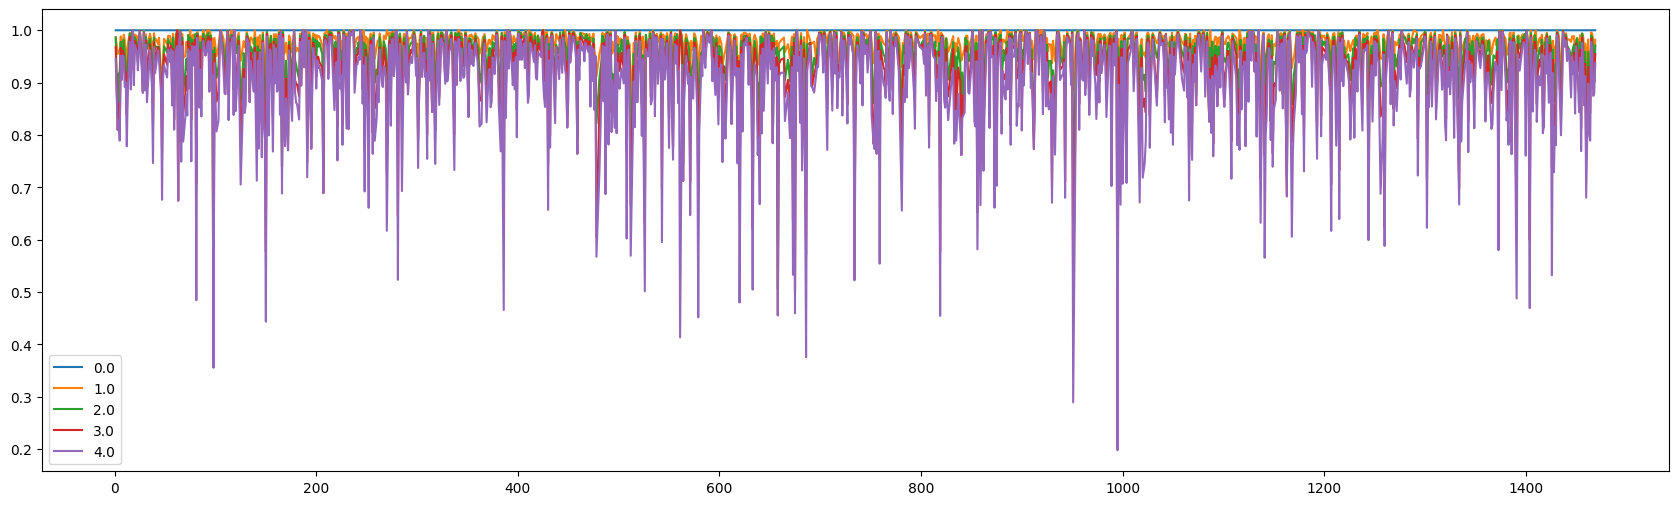

In [13]:
# 5명에 대해서 향후 기간 동안의 생존 분석을 수행하면 다음과 같다.
pd.DataFrame(predictions).head().T.plot(figsize=(21,6))
plt.show()

In [14]:
coxph.print_summary()

<lifelines.CoxPHFitter: fitted with 1470 total observations, 1233 right-censored observations>
             duration col = 'YearsAtCompany'
                event col = 'Attrition'
      baseline estimation = breslow
   number of observations = 1470
number of events observed = 237
   partial log-likelihood = -1449.16
         time fit was run = 2024-03-24 22:42:32 UTC

---
                           coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                        
EnvironmentSatisfaction   -0.24       0.79       0.06            -0.35            -0.12                 0.70                 0.89
JobInvolvement            -0.44       0.65       0.09            -0.61            -0.27                 0.55                 0.76
JobLevel                  -1.02       0.36       0.09            -1.20            -0.83                 0.30                 0.44
JobSatisfaction           -0.22       0.81       0.06            -0.33            -0.10                 0.72                 0.90
PercentSalaryHike         -0.01       0.99       0.02            -0.04             0.03                 0.96                 1.03
RelationshipSatisfaction  -0.08       0.92       0.06            -0.20             0.04                 0.82                 1.04
StockOptionLevel          -0.42       0.65       0.09            -0.60            -0.24                 0.55                 0.78
TrainingTimesLastYear     -0.17       0.85       0.05            -0.28            -0.06                 0.76                 0.94

                           cmp to      z      p   -log2(p)
covariate                                                 
EnvironmentSatisfaction      0.00  -4.00 <0.005      13.92
JobInvolvement               0.00  -5.08 <0.005      21.31
JobLevel                     0.00 -10.77 <0.005      87.49
JobSatisfaction              0.00  -3.77 <0.005      12.61
PercentSalaryHike            0.00  -0.44   0.66       0.60
RelationshipSatisfaction     0.00  -1.34   0.18       2.46
StockOptionLevel             0.00  -4.63 <0.005      18.04
TrainingTimesLastYear        0.00  -3.07 <0.005       8.84
---
Concordance = 0.79
Partial AIC = 2914.33
log-likelihood ratio test = 249.92 on 8 df
-log2(p) of ll-ratio test = 161.93

- 변수 유의 수준
- 해당 계수를 보면 exponential이 쓰인 결과를 얻을 수 있음
- 콕스 회귀분석에서는 종속변수의 영향이 미치는 크기를 HR(Hazard Ratio)라고 함.
- 실제 계수 구하려면 log씌어야함 → 해석할 때 **exp(coef)** 보고 해석
    - 연속형 변수: 단위가 하나 증가할 수록 exp(coef)배 로 위험비율
    - 범주형 변수: 특정 기준 변수 대비 exp(coef)배로 위험비율

<Axes: xlabel='log(HR) (95% CI)'>

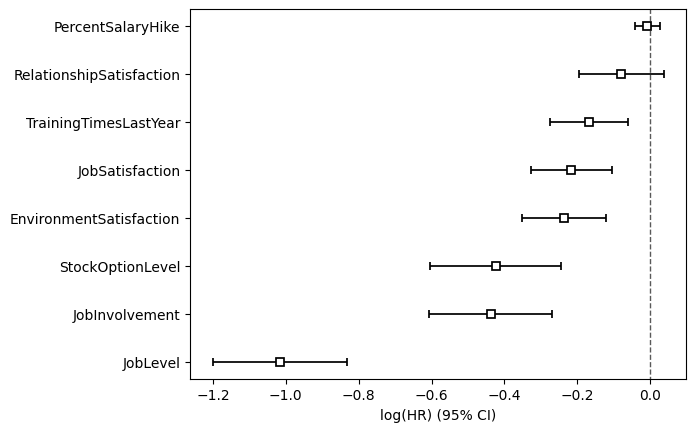

In [15]:
# 변수 plotting
coxph.plot()
# 연봉 인상률이나 관계 만족도에 따라 이탈여부가 결정됨

https://data-newbie.tistory.com/920 <br>
https://bioinformaticsandme.tistory.com/223